In [1]:
!pip install -U gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:
!gdown 1KR_7-SMuvH0rLmZawqoIZYm6V1mVjHrA

Downloading...
From (uriginal): https://drive.google.com/uc?id=1KR_7-SMuvH0rLmZawqoIZYm6V1mVjHrA
From (redirected): https://drive.google.com/uc?id=1KR_7-SMuvH0rLmZawqoIZYm6V1mVjHrA&confirm=t&uuid=6bb69f65-c2f0-43dc-a077-e3711fe600df
To: /content/data.zip
100% 1.14G/1.14G [00:14<00:00, 80.5MB/s]


In [4]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/normal_2072.jpg    
  inflating: data/normal_2881.jpg    
  inflating: data/normal_2942.jpg    
  inflating: data/cataract_860.jpg   
  inflating: data/normal_788.jpg     
  inflating: data/normal_2981.jpg    
  inflating: data/normal_2969.jpg    
  inflating: data/normal_736.jpg     
  inflating: data/normal_2122.jpg    
  inflating: data/normal_1134.jpg    
  inflating: data/normal_868.jpg     
  inflating: data/normal_930.jpg     
  inflating: data/normal_2023.jpg    
  inflating: data/cataract_363.jpg   
  inflating: data/normal_2300.jpg    
  inflating: data/normal_1272.jpg    
  inflating: data/normal_290.jpg     
  inflating: data/normal_2336.jpg    
  inflating: data/normal_1523.jpg    
  inflating: data/normal_954.jpg     
  inflating: data/normal_1991.jpg    
  inflating: data/cataract_285.jpg   
  inflating: data/normal_2222.jpg    
  inflating: data/normal_2649.jpg    
  inflating: data/normal_1482.jpg    
  i

In [20]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

In [5]:
os.mkdir('dataset/')
os.mkdir('dataset/normal/')
os.mkdir('dataset/cataract/')
files = sorted(glob(os.path.join('', "data/*")))
for file in files:
    if len(file.split('cataract_'))==1:
        shutil.copy(file, 'dataset/normal/')
    else:
        shutil.copy(file, 'dataset/cataract/')

In [6]:
dataset_path_train = os.listdir('dataset')
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))

['normal', 'cataract']
Types of classes labels found:  2


In [7]:
class_labels = []

for item in dataset_path_train:
 all_classes = os.listdir('dataset' + '/' +item+'/')
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [9]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
df.head()

,Labels,image
0,normal,dataset_path/normal/normal_1532.jpg
1,normal,dataset_path/normal/normal_2721.jpg
2,normal,dataset_path/normal/normal_2698.jpg
3,normal,dataset_path/normal/normal_1617.jpg
4,normal,dataset_path/normal/normal_695.jpg


In [11]:
data_dir = pathlib.Path("dataset")
img_height = 224
img_width = 224
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='training')

Found 2922 files belonging to 2 classes.
Using 2338 files for training.


In [12]:
val_dataset = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=0.2,
                                      subset='validation',)

Found 2922 files belonging to 2 classes.
Using 584 files for validation.


real label: normal


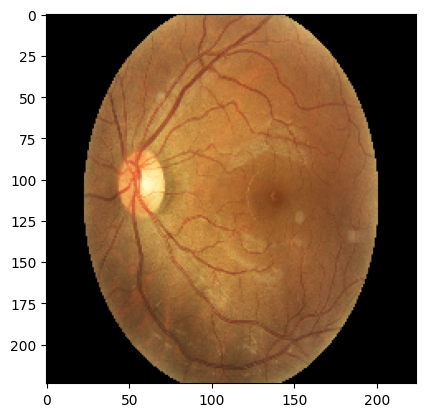

In [42]:
labels = train_dataset.class_names
labels
for images_batch, labels_batch in val_dataset.take(1):

    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()

    plt.imshow(image)
    print("real label:", labels[label])

In [21]:
base = VGG16(weights = "imagenet", include_top = False, input_shape=(224,224,3))
for layer in base.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
model = Sequential()
model.add(base)
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

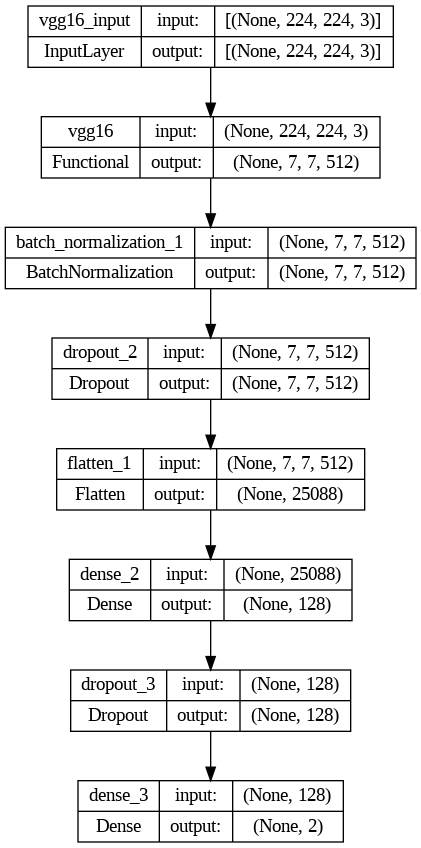

In [23]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='my-plant.png', show_shapes=True)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 15, verbose = 1)

Epoch 1/15
74/74 [==============================] - 48s 541ms/step - loss: 0.4398 - accuracy: 0.9179 - val_loss: 0.2284 - val_accuracy: 0.9384
Epoch 2/15
74/74 [==============================] - 43s 550ms/step - loss: 0.1430 - accuracy: 0.9534 - val_loss: 0.1431 - val_accuracy: 0.9589
Epoch 3/15
74/74 [==============================] - 40s 512ms/step - loss: 0.1085 - accuracy: 0.9658 - val_loss: 0.1341 - val_accuracy: 0.9572
Epoch 4/15
74/74 [==============================] - 42s 536ms/step - loss: 0.0959 - accuracy: 0.9688 - val_loss: 0.1761 - val_accuracy: 0.9538
Epoch 5/15
74/74 [==============================] - 40s 515ms/step - loss: 0.0689 - accuracy: 0.9713 - val_loss: 0.1210 - val_accuracy: 0.9623
Epoch 6/15
74/74 [==============================] - 41s 523ms/step - loss: 0.0512 - accuracy: 0.9812 - val_loss: 0.1398 - val_accuracy: 0.9606
Epoch 7/15
74/74 [==============================] - 42s 536ms/step - loss: 0.0560 - accuracy: 0.9799 - val_loss: 0.1283 - val_accuracy: 0.9606

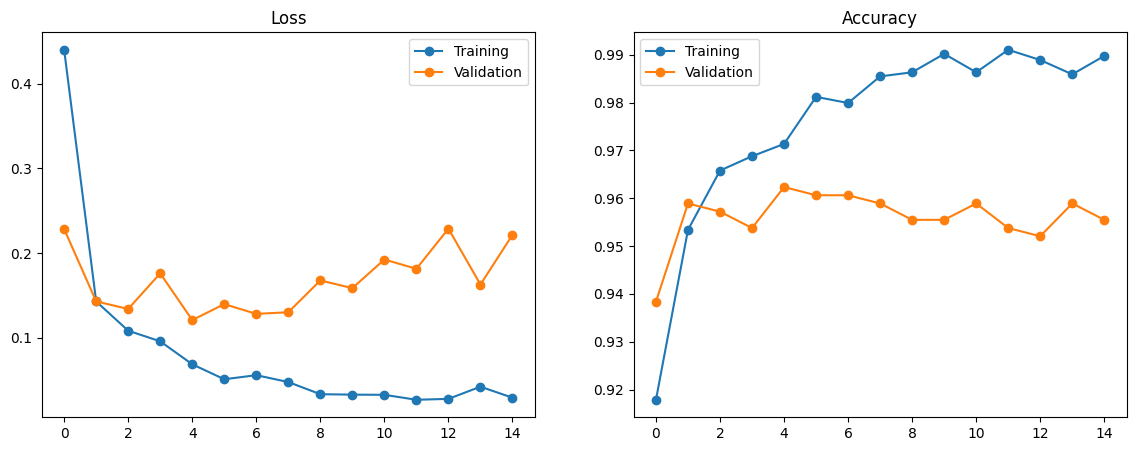

In [27]:
plt.figure(figsize = (14, 5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], marker = 'o', label = 'Training')
plt.plot(history.history['val_loss'], marker='o', label = 'Validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], marker = 'o', label = 'Training')
plt.plot(history.history['val_accuracy'], marker='o', label = 'Validation')
plt.legend()

In [28]:
prfc = model.evaluate(val_dataset)

19/19 [==============================] - 8s 228ms/step - loss: 0.2216 - accuracy: 0.9555


real label: normal
1/1 [==============================] - 0s 79ms/step
predicted label: normal
real label: cataract
1/1 [==============================] - 0s 27ms/step
predicted label: cataract
real label: normal
1/1 [==============================] - 0s 33ms/step
predicted label: normal
real label: cataract
1/1 [==============================] - 0s 32ms/step
predicted label: cataract
real label: normal
1/1 [==============================] - 0s 34ms/step
predicted label: normal


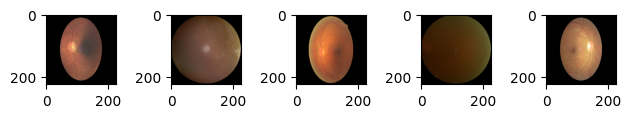

In [37]:
labels = train_dataset.class_names
labels
for i in range(5):
  for images_batch, labels_batch in val_dataset.take(1):

      image = images_batch[0].numpy().astype('uint8')
      label = labels_batch[0].numpy()

      # plt.imshow(image)
      print("real label:", labels[label])

      batch_prediction = model.predict(images_batch)
      print("predicted label:", labels[np.argmax(batch_prediction[0])])

      plt.subplot(2,5,i+1)
      plt.imshow(image)
plt.tight_layout()